## IMDB Movie Data Analysis
##### By Niamh Clarke


 The analysis is split into the following sections: 

- Initial exploration 
- Analysis of categorical variables 
- Analysis of continuous variables 
- Deep dive on Production Companies 
- Deep dive on Top Voted Movies 
- Deep dive on Movie Descriptions

### 1. Initial Exploration

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [4]:
!wget -O /content/movies.csv "https://www.dropbox.com/s/9dyc28ywinkqyg9/imdb_movies.csv?dl=0"

--2023-05-18 20:17:11--  https://www.dropbox.com/s/9dyc28ywinkqyg9/imdb_movies.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/9dyc28ywinkqyg9/imdb_movies.csv [following]
--2023-05-18 20:17:12--  https://www.dropbox.com/s/raw/9dyc28ywinkqyg9/imdb_movies.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc18de32e9452e14a9282f7347b3.dl.dropboxusercontent.com/cd/0/inline/B8SsfR_OiJ8fknrFgE80FJ7L3edb7SG39d66vcQn55xnJm0vS-bdiKjmaGAffgptTjUR3IopDCrEXGwWs3FK8Ko127PjONf8PWbx1QkZbH0zTTVBymf2srnoI-lf4olK8KsL230M05aYZ2XnhAOzuNhPHtWIHuIOD_n5_SYRH-rA9g/file# [following]
--2023-05-18 20:17:12--  https://uc18de32e9452e14a9282f7347b3.dl.dropboxusercontent.com/cd/0/inline/B8SsfR_OiJ8fknrFgE80FJ7L3edb7SG39d66vcQn55xnJm0vS-bdiKjmaGAffgptTj

In [6]:
#Reading in the movies dataset
movies = pd.read_csv('/content/movies.csv', low_memory = False)


In [7]:
##Exploring the movies data
print(movies.head())


  imdb_title_id                        title               original_title  \
0     tt0000009                   Miss Jerry                   Miss Jerry   
1     tt0000574  The Story of the Kelly Gang  The Story of the Kelly Gang   
2     tt0001892               Den sorte drøm               Den sorte drøm   
3     tt0002101                    Cleopatra                    Cleopatra   
4     tt0002130                    L'Inferno                    L'Inferno   

   year date_published                      genre  duration           country  \
0  1894     1894-10-09                    Romance        45               USA   
1  1906     1906-12-26    Biography, Crime, Drama        70         Australia   
2  1911     1911-08-19                      Drama        53  Germany, Denmark   
3  1912     1912-11-13             Drama, History       100               USA   
4  1911     1911-03-06  Adventure, Drama, Fantasy        68             Italy   

  language                             director  .

In [ ]:
##Getting percentage of missing data
print((movies.isnull().sum()/len(movies))*100)

imdb_title_id             0.000000
title                     0.000000
original_title            0.000000
year                      0.000000
date_published            0.000000
genre                     0.000000
duration                  0.000000
country                   0.074544
language                  0.970241
director                  0.101334
writer                    1.830994
production_company        5.188981
actors                    0.080368
description               2.463456
avg_vote                  0.000000
votes                     0.000000
budget                   72.383670
usa_gross_income         82.148972
worlwide_gross_income    63.873974
metascore                84.502941
reviews_from_users        8.848640
reviews_from_critics     13.740609
dtype: float64


The percentage of missing data for each variable can be seen above. There is a large % of missing data (>70%) for budget, usa_gross_income, worlwide_gross_income and metascore. Reviews from critics is missing ~13% of values. The other variables have a low % of missing data. 

In [ ]:
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

Looking at the type of variables, some will have to be converted in order to carry out my anaysis. Year and date published will have to be converted to type date. If I am using budget, usa_gross_income and worlwide_gross_income they will have to converted to type int. Since there is a large % of missing data for budget, usa_gross_income and worlwide_gross_income I will not use them in my main analysis. 

In [ ]:
##Looking at summary statistics for some of the variables ##

##Count movies by year##

##There was a year value with text in it. I changed this to be just the number year value
movies.loc[movies.year == "TV Movie 2019",'year'] = 2019
movies.loc[movies.date_published == "TV Movie 2019",'date_published'] = '2019-01-01'

##Converting the year and date_published variable to be a date type

movies.year = pd.to_datetime(movies["year"]).dt.year
movies.date_published = pd.to_datetime(movies["date_published"])

moviesYear = movies.groupby(["year"]).count()['imdb_title_id']

##Looking at the max and min number of movies per year 
print(moviesYear[moviesYear.values == moviesYear.max()])
print(moviesYear[moviesYear.values == moviesYear.min()])

##Looking at top 10 years by count of movies
moviesYear.sort_values(ascending=False)[:10]

year
2017    3329
Name: imdb_title_id, dtype: int64
year
1894    1
1906    1
Name: imdb_title_id, dtype: int64


year
2017    3329
2018    3257
2016    3138
2015    2977
2014    2942
2019    2841
2013    2783
2012    2560
2011    2429
2009    2298
Name: imdb_title_id, dtype: int64

<AxesSubplot:xlabel='year', ylabel='Count'>

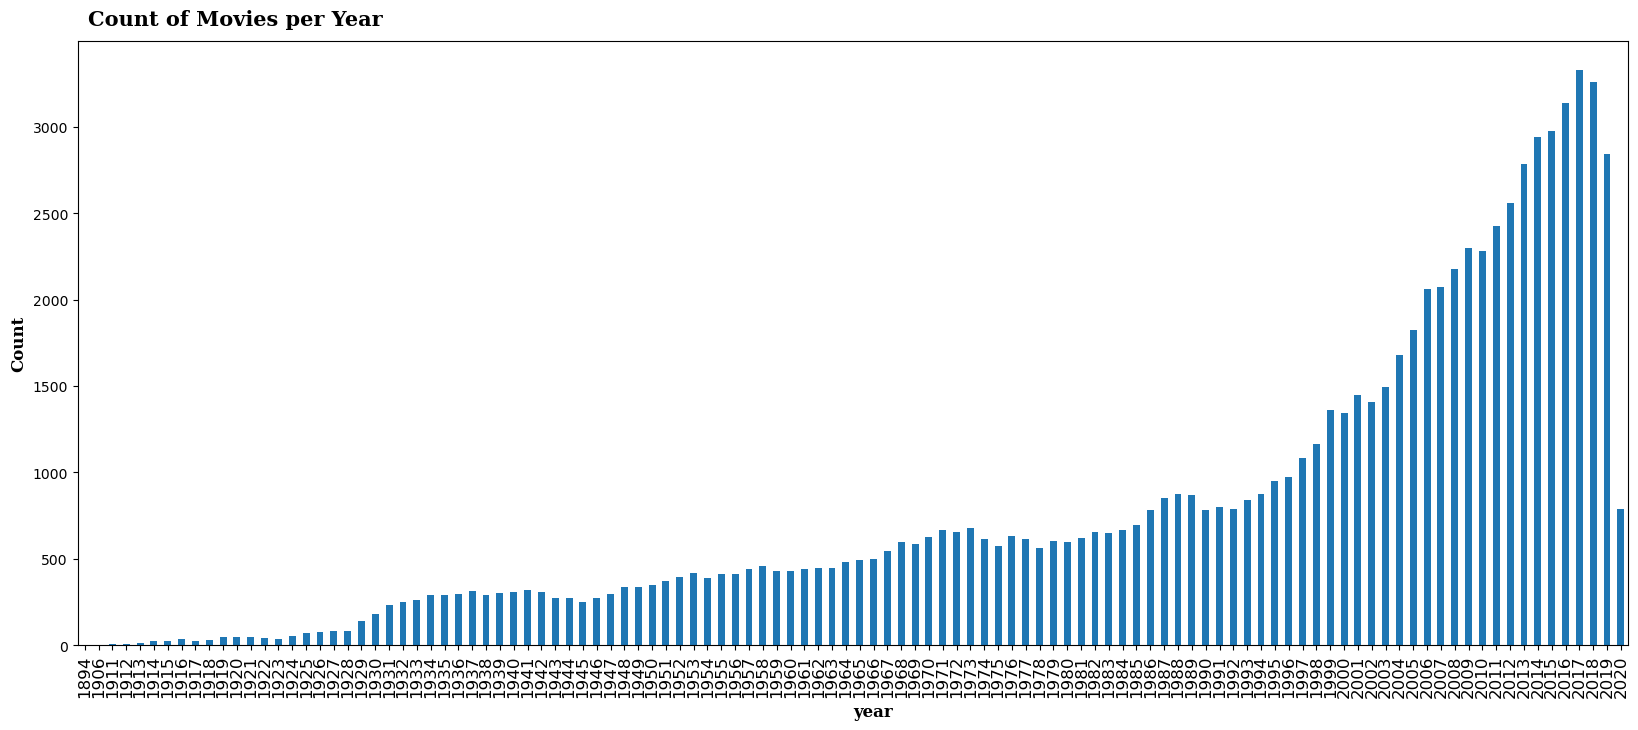

In [ ]:
##Plot of count of movies by year
fig, ax = plt.subplots(figsize=(20, 8), dpi=100)
   
# Tick labels
ax.set_xlabel('xlabel', ha='left', va = 'top')

# Title and sub-title
fig.text(0.13, 0.90, 'Count of Movies per Year', fontsize=15, fontweight='bold', fontfamily='serif')

#Axis labels

plt.xlabel("Country", fontsize=12, fontweight='bold', fontfamily='serif')
plt.ylabel("Count", fontsize=12, fontweight='bold', fontfamily='serif')
    
ax.tick_params(axis='x', which='major', labelsize=12)

movies.groupby([movies['year']]).count()['imdb_title_id'].plot(kind = 'bar',ax=ax)





Looking at the plot of movie count by year we can see that the number of movies being created each year has been growing since ~1900. We can identify some slight dips over the 100 years of data which are quite interesting. There is a dip ~1943 to 1945 which would have been WW2. We can see another dip in 1974/1975(US stock crash?) and then again in 1990 (1990's recession?). Since early 2000's growth had remained steady until 2019. We don't have all the data here from 2020 but I imagine we would see a dip again due to covid.   

### 2. Analysis of categorical variables

In [ ]:
##Exploring genre and country data## 

##Looking at how many movies per genres there are 
print(movies.groupby(['genre']).count()['imdb_title_id'])

##There are a few different genres and countries for each movie. 
##I'm going to filter it by taking the first one in the string to carry out some analysis. By doing this, I am assuming the first 
##value is the more prominant one. 
movies['first_genre'] = movies.genre.str.split(", ",expand=True)[0]
movies['first_country'] = movies.country.str.split(", ",expand=True)[0]

movies.groupby([movies.first_genre]).count()['imdb_title_id'].sort_values(ascending=False)



genre
Action                          715
Action, Adventure               200
Action, Adventure, Biography     31
Action, Adventure, Comedy       606
Action, Adventure, Crime        229
                               ... 
Western, Comedy                   6
Western, Comedy, Drama            1
Western, Drama                    3
Western, Family                   1
Western, Horror                   1
Name: imdb_title_id, Length: 1257, dtype: int64


first_genre
Drama          25386
Comedy         24297
Action         12182
Crime           5557
Horror          5113
Adventure       3599
Animation       2108
Biography       2067
Thriller        1375
Romance          767
Family           638
Western          617
Mystery          593
Fantasy          502
Sci-Fi           417
Musical          324
War              107
History           80
Music             77
Film-Noir         29
Sport             16
Adult              2
Documentary        2
Name: imdb_title_id, dtype: int64

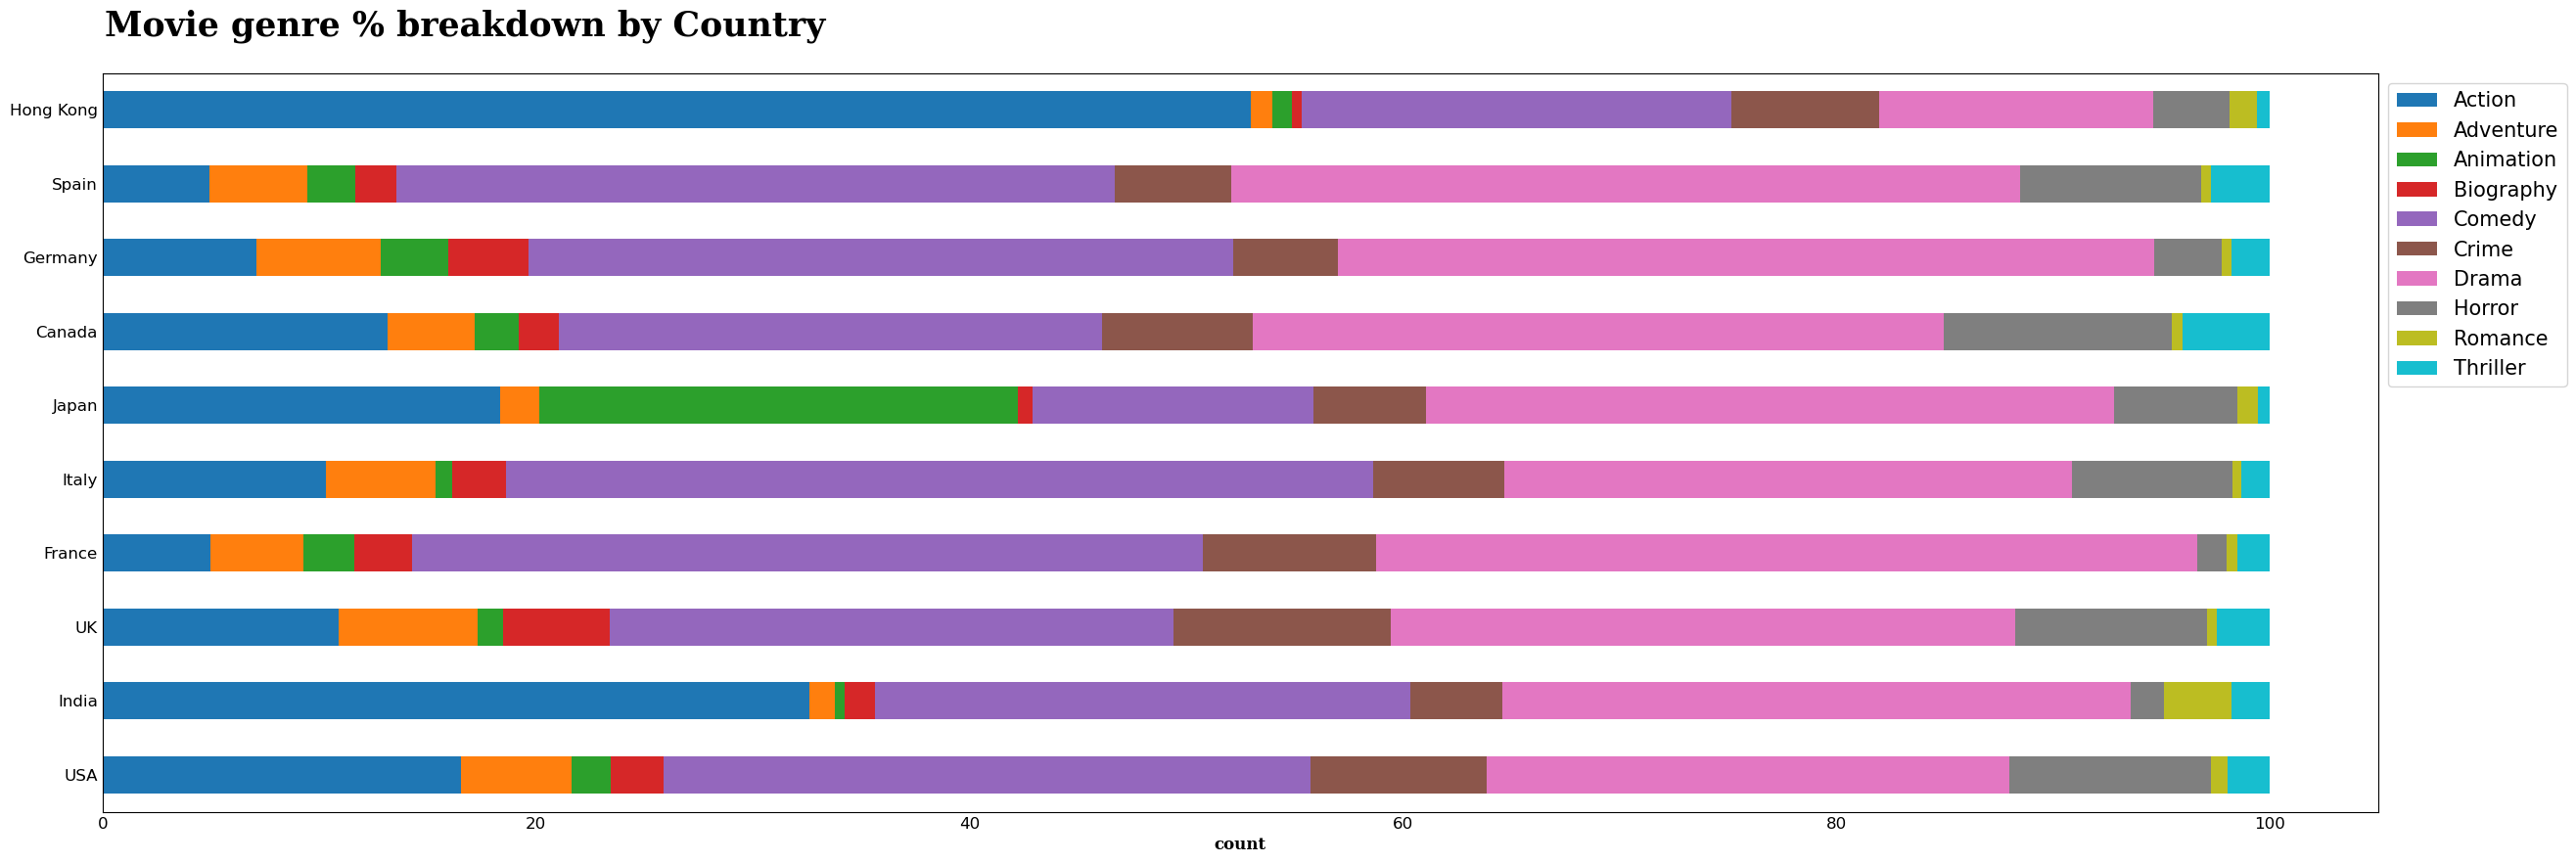

In [ ]:
##Getting the top ten countries and genre based on count of movies
country_order = movies.first_country.value_counts()[:10].index
genre_order = movies.first_genre.value_counts()[:10].index
##Summing the movies by genres by country
country_genre = movies[movies.first_genre.isin(genre_order)][['first_genre','first_country']].groupby('first_country')['first_genre'].value_counts().unstack().loc[country_order]
##Getting the sum of the columns and dividing by rows to get the percentage 
country_genre_pct = country_genre.div(country_genre.sum(axis=1),axis=0)*100

##Creating a stacked bar chart - using.plot because it is easier for stacked charts with multiple rows
fig, ax = plt.subplots(1,1,figsize=(30, 10), dpi=100)


#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))
##Title
ax.text(0.09, 10, 'Movie genre % breakdown by Country', fontsize=25, fontweight='bold', fontfamily='serif')


ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis=u'both', which=u'both',length=0)

country_genre_pct.plot(kind = 'barh', stacked = True, ax=ax)
ax.tick_params(axis='x', which='major', labelsize=12)
ax.tick_params(axis='y', which='major', labelsize=12)
plt.xlabel("count", fontsize=12, fontweight='bold', fontfamily='serif')

##Positioning legend to the right

ax.legend(bbox_to_anchor=(1, 1.),prop={'size': 15})



Looking at the movie genre breakdown by country we can see the movies produced in HongKong are ~50% action movies. Most countries produce mainly comedy and drama movies. Spain, Canada, Italy, UK and USA produce a larger % of horror movies compared to other countries. The UK produces the largest % of Crime movies, accounting for ~5-10% of total movies produced in the UK. Japans movie portfolio has a much larger % of animation movies compared to other countries. This is possibly due to the popularity of Anime in Japan. 

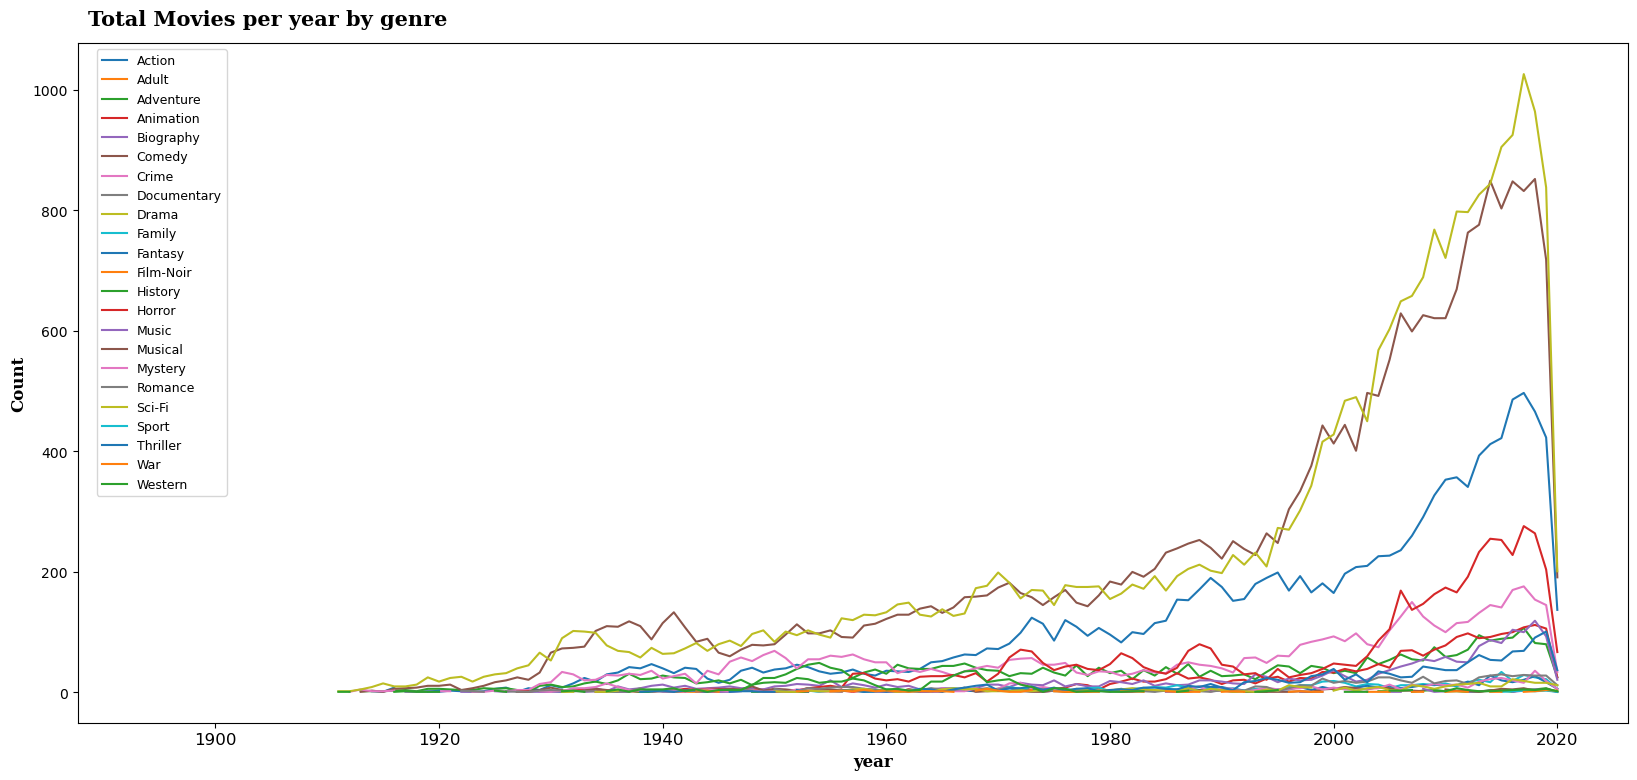

In [ ]:
##Plotting Genre data by Year ## 

fig, ax = plt.subplots(1,1,figsize=(20, 9), dpi=100)

# Tick labels
ax.set_xlabel('xlabel', ha='left', va = 'top')

# Title and sub-title
fig.text(0.13, 0.90, 'Total Movies per year by genre', fontsize=15, fontweight='bold', fontfamily='serif')

#Axis labels and legend

plt.xlabel('Total Movies', fontsize=12, fontweight='bold', fontfamily='serif')
plt.ylabel('Count', fontsize=12, fontweight='bold', fontfamily='serif')

ax.tick_params(axis='x', which='major', labelsize=12)

movies.groupby(["year","first_genre"]).count()['imdb_title_id'].unstack().plot(ax=ax)

ax.legend(bbox_to_anchor=(0.1, 1),prop={'size': 9})


We can see that the largest number of movies are comedy and drama. The least common genres are Adult, Film-Noir and Sport. 

Looking at this by year, the number of movies produced per year has varied only slightly with drama and comedy being the highest number produced each year over the past 100 years. Between 1940 - 1960 there were more crime films then action. Horror films saw an increase in production in 1972 and 1989. 

In more recent years, animation films have seen some growth, outtaking the number of action movies being produced. 

In [ ]:
## Exploring country data ## 

movies.groupby(['country']).count()['imdb_title_id']
movies.country.str.split(", ",expand=True)

##4907 countries variations... Splitting out the countries to count the occurances of each country regardless of if they were listed 
##first or not 
df = movies.country.str.split(", ",expand=True)
totalCountries = pd.Series(df.values.ravel('F')).dropna()
totalCountries.groupby(totalCountries).count().sort_values(ascending=False)


USA                              34325
France                            8311
UK                                7490
India                             6373
Italy                             5056
                                 ...  
Suriname                             1
Svalbard And Jan Mayen               1
Malawi                               1
Maldives                             1
Holy See (Vatican City State)        1
Length: 194, dtype: int64

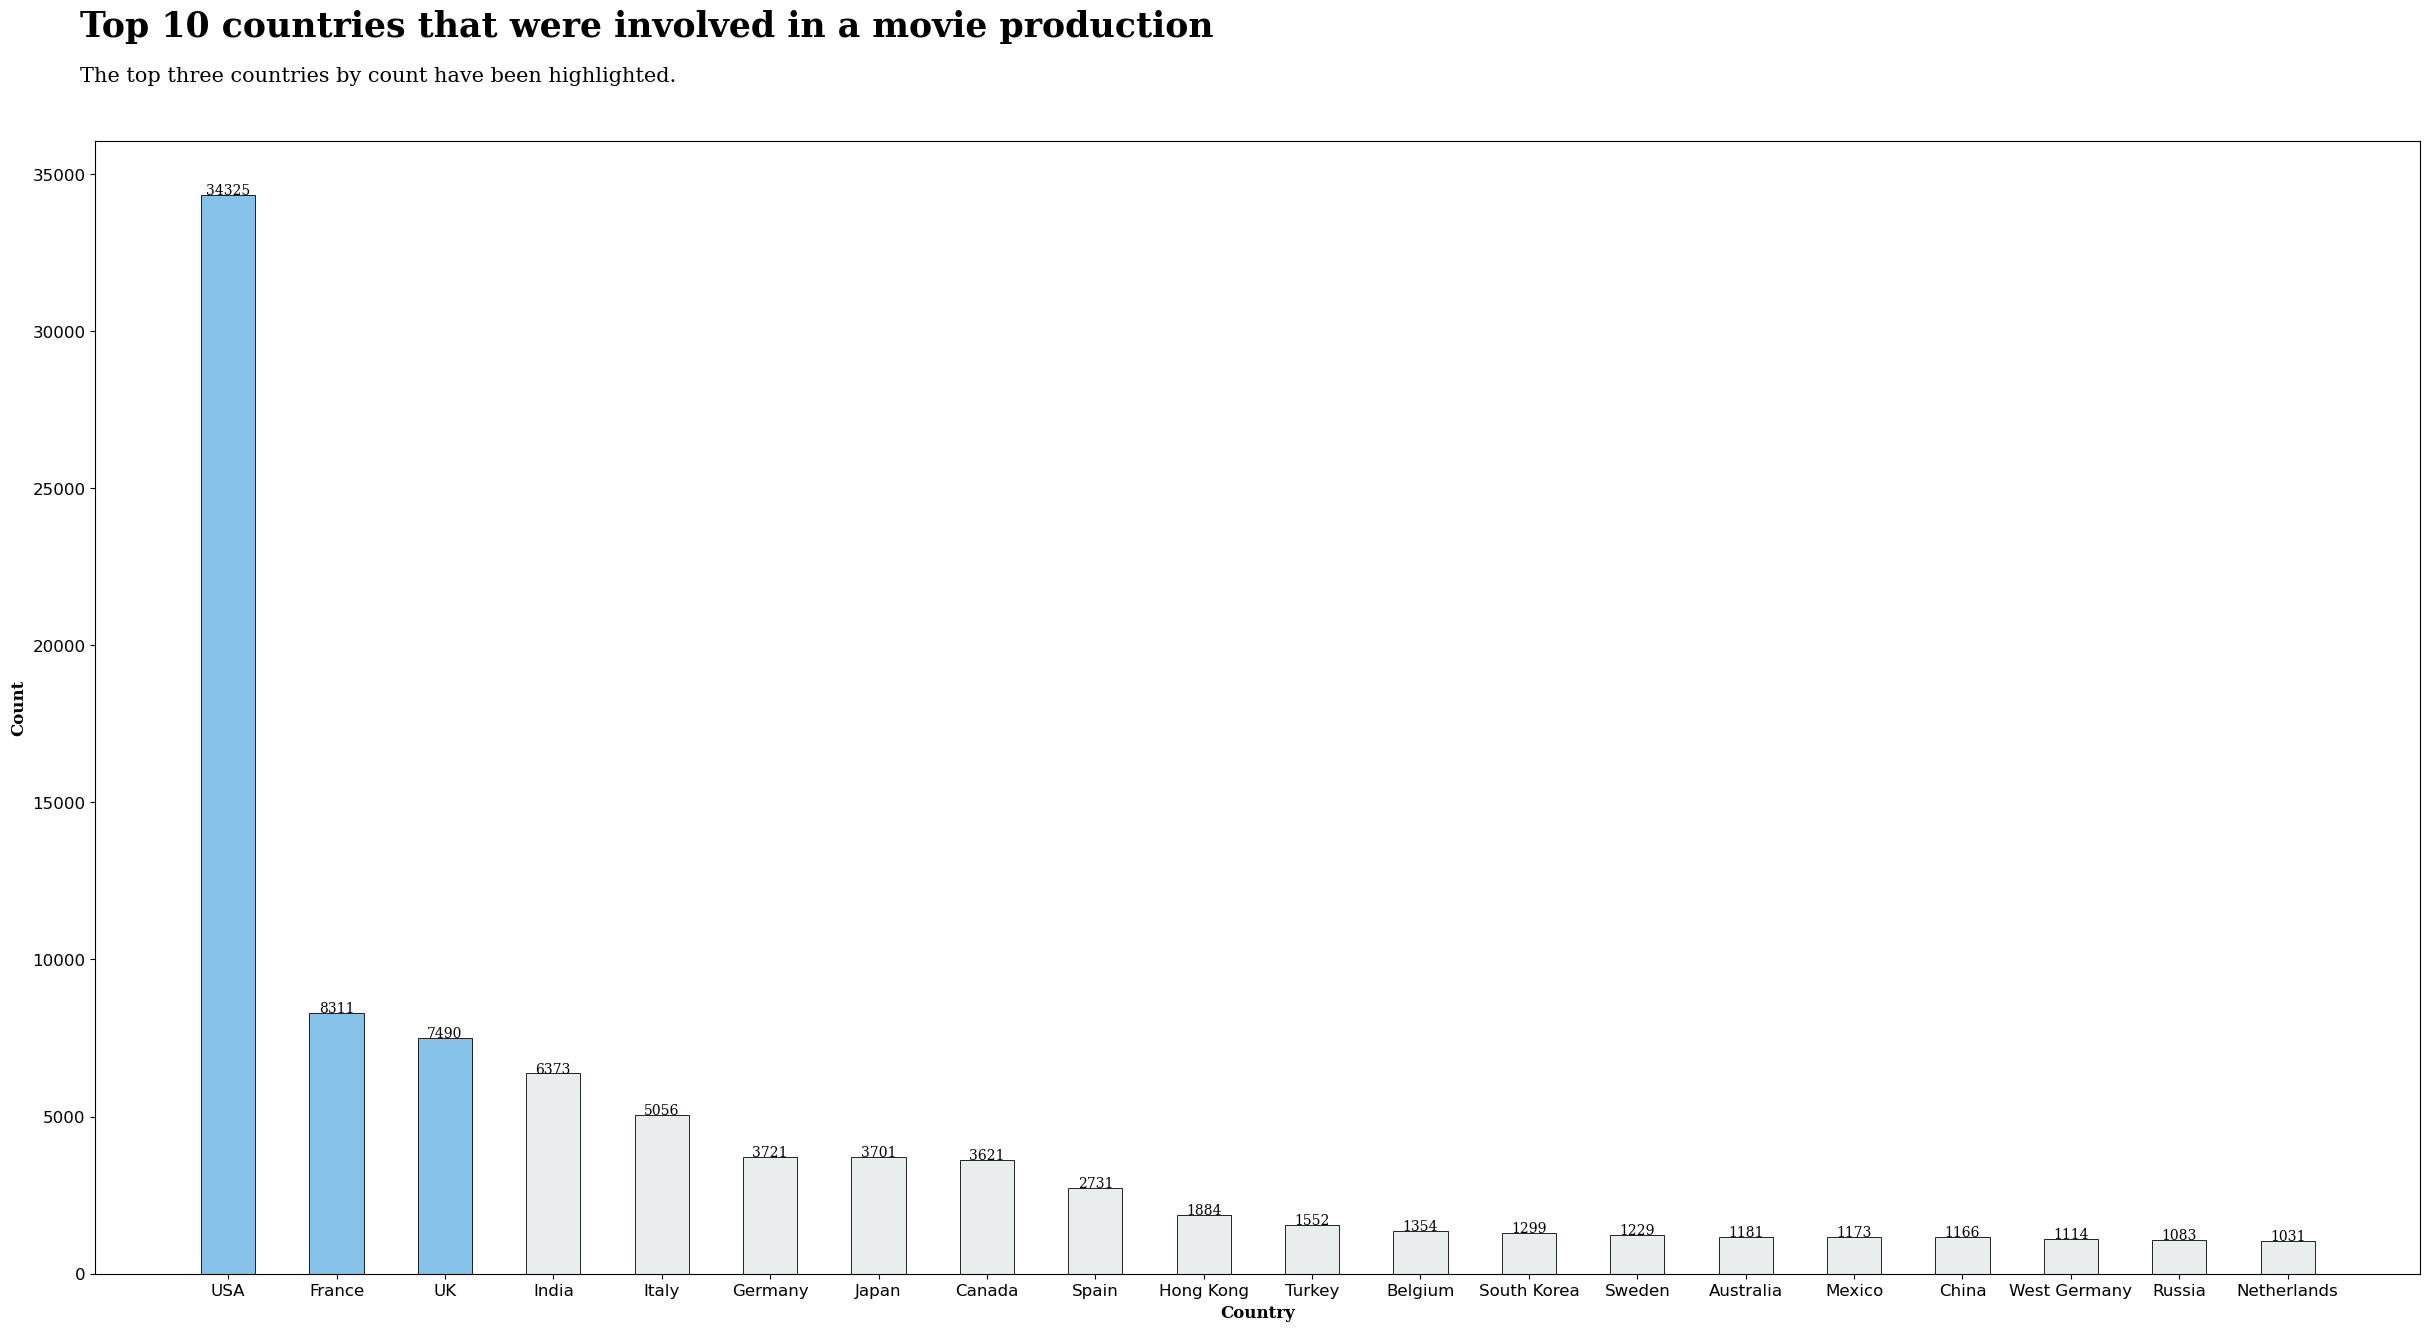

In [ ]:
##Plotting country data##

#Counting country occurances in order to plot. Only taking the top first 10
countryData = totalCountries.groupby(totalCountries).count().sort_values(ascending=False)[:20]

# Plot
##Applying color '#EAEDED' to 20 values in a list
color_map = ['#EAEDED' for _ in range(20)]
# blue color highlight for the top three countries
color_map[0] = color_map[1] = color_map[2] =  '#85C1E9' 

fig, ax = plt.subplots(1,1, figsize=(30, 15), dpi=100)

ax.bar(countryData.index, countryData, width=0.5, 
       edgecolor='black',
       linewidth=0.6,color=color_map)

#annotations
for i in countryData.index:
    ax.annotate(f"{countryData[i]}", 
                   xy=(i, countryData[i] + 150), 
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')
   
#Title and sub-title
fig.text(0.12, 0.95, 'Top 10 countries that were involved in a movie production', fontsize=25, fontweight='bold', fontfamily='serif')
fig.text(0.12, 0.92, 'The top three countries by count have been highlighted.', fontsize=15, fontweight='light', fontfamily='serif')


#Axis labels

plt.xlabel("Country", fontsize=12, fontweight='bold', fontfamily='serif')
plt.ylabel("Count", fontsize=12, fontweight='bold', fontfamily='serif')


ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()

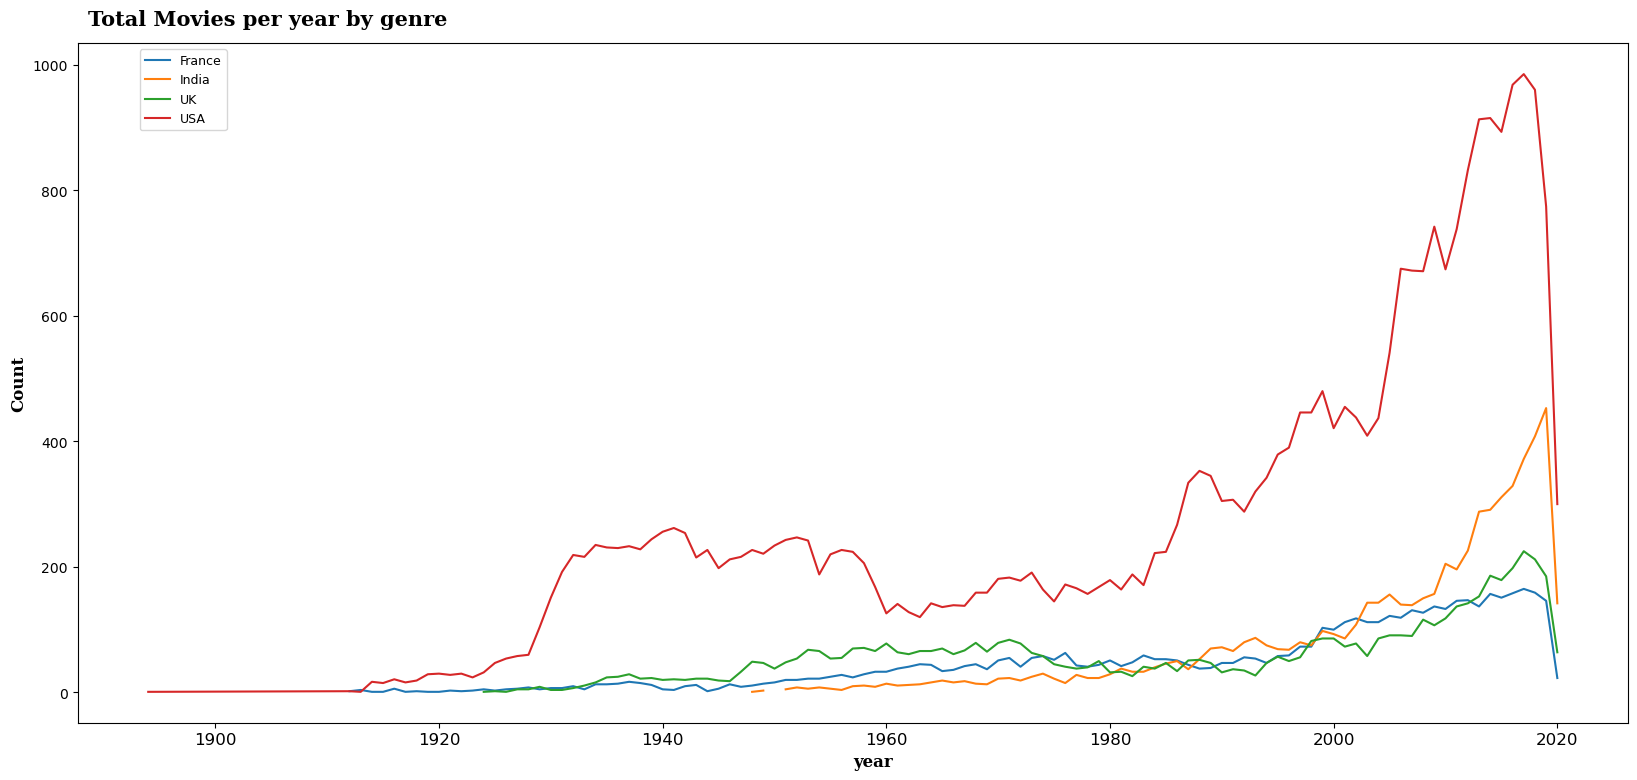

In [ ]:
##Plotting Genre data by Year ## 

fig, ax = plt.subplots(1,1,figsize=(20, 9), dpi=100)

# Tick labels
ax.set_xlabel('xlabel', ha='left', va = 'top')

# Title and sub-title
fig.text(0.13, 0.90, 'Total Movies per year by genre', fontsize=15, fontweight='bold', fontfamily='serif')

#Axis labels and legend

plt.xlabel('Total Movies', fontsize=12, fontweight='bold', fontfamily='serif')
plt.ylabel('Count', fontsize=12, fontweight='bold', fontfamily='serif')

ax.tick_params(axis='x', which='major', labelsize=12)

movies[movies.first_country.isin(["USA","France","UK","India"])].groupby(["year","first_country"]).count()['imdb_title_id'].unstack().plot(ax=ax)

ax.legend(bbox_to_anchor=(0.1, 1),prop={'size': 9})

The top 3 countries involved in movie productions are USA, France and the UK. I initially found it surprising that France has been involved in more movie productions than India, where Bollywood is quite popular, but looking at the number of movies produced by year that involved these countries, India involvement in movies production has only really grown in the past 20 years. France has been producing movies for longer and was producing more movies then India between 1940 to 1980. I imagine that in a few more years India will out take both France and the UK in terms of total movies produced.  

### 3. Analysis of continuous variables

In [ ]:
##Looking at the summary stats of continuous variables
print(movies.describe())

print("\nThe movie with the longest duration is " + movies.loc[movies.duration == movies.duration.max(),"original_title"].to_string(index=False, header=False) + " - " + movies.loc[movies.duration == movies.duration.max(),"year"].to_string(index=False, header=False))

print("\nThe movie with the longest duration is " + movies.loc[movies.duration == movies.duration.min(),"original_title"].to_string(index=False, header=False) + " - " + movies.loc[movies.duration == movies.duration.min(),"year"].to_string(index=False, header=False))



               year      duration      avg_vote         votes     metascore  \
count  85855.000000  85855.000000  85855.000000  8.585500e+04  13305.000000   
mean    1993.500320    100.351418      5.898656  9.493490e+03     55.896881   
std       24.216396     22.553848      1.234987  5.357436e+04     17.784874   
min     1894.000000     41.000000      1.000000  9.900000e+01      1.000000   
25%     1979.000000     88.000000      5.200000  2.050000e+02     43.000000   
50%     2003.000000     96.000000      6.100000  4.840000e+02     57.000000   
75%     2013.000000    108.000000      6.800000  1.766500e+03     69.000000   
max     2020.000000    808.000000      9.900000  2.278845e+06    100.000000   

       reviews_from_users  reviews_from_critics  
count        78258.000000          74058.000000  
mean            46.040826             27.479989  
std            178.511411             58.339158  
min              1.000000              1.000000  
25%              4.000000             

Looking at the summary statistics above, movie durations have an IQR of 88minutes - 108 minutes. The average movie duration is 100 minutes. There is a large outlier with the max duration being 808 minutes for a movie called 'La Flor' produced in 2016. The movie is the min duration is a movie called 'Doragon bôru Z' produced in 1989.  

Avg_vote has a small IQ of 5.2 - 6.8. The max avg_vote for a movie is 9.9 and the min is 1.  

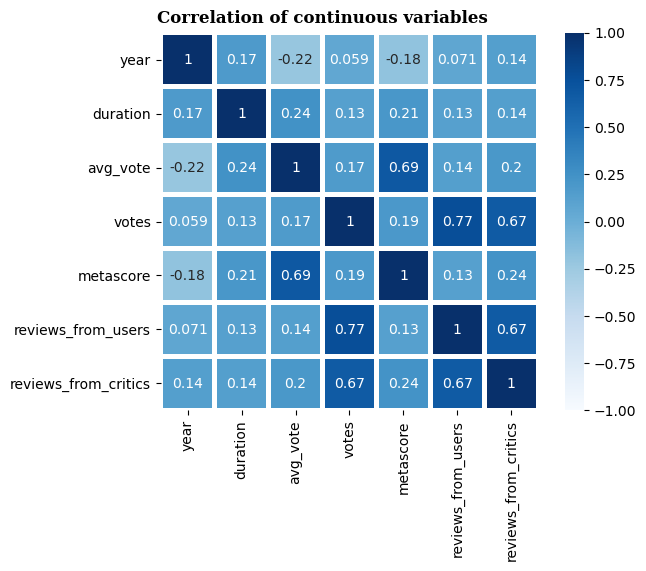

In [ ]:
##Correlation of the continuous variables 
import seaborn as sns

fig, ax = plt.subplots(figsize=(7, 5), dpi=100)
fig.text(.2,0.9,'Correlation of continuous variables', fontsize=12, fontweight='bold', fontfamily='serif')

corr = movies.corr()
pl = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool),cmap="Blues", vmax=1,
                 vmin=-1, center=0, square=True, linewidths=2.5, annot=True)

plt.show()



Some of the continous variables have a relatively strong correlation. 'votes' and 'reviews_from_users' have the strongest correlation with a value of ~0.7. 'avg_vote' and year has a negative correlation which is interesting showing that avg vote decreases with year. 

I will look into some of these variables in more detail below. 

#### 'duration' and 'avg_vote' by Movie Genre



  Duration by Genre 

The movie with the longest duration is La flor


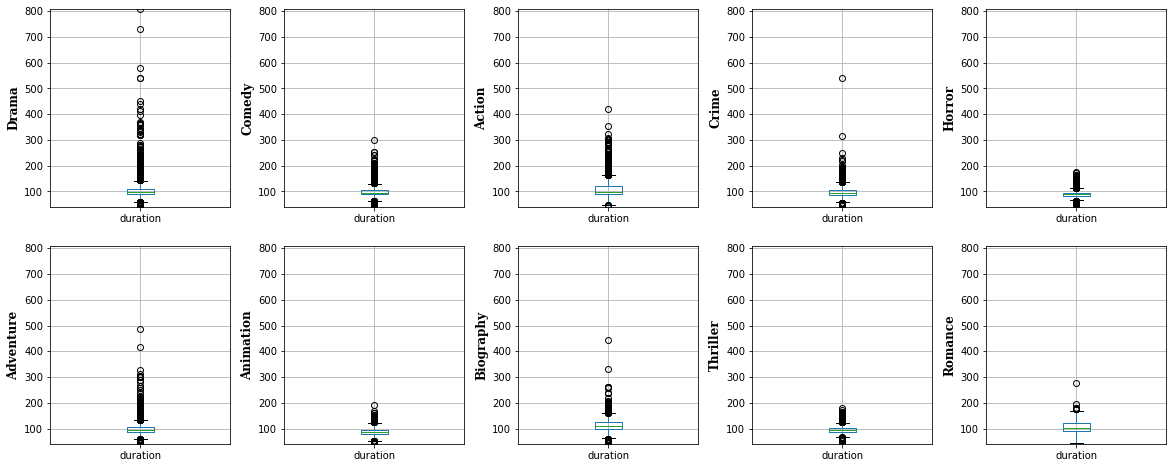

In [ ]:
##Getting mean of movie duration by genres for top 10 genres
genre_duration = movies[movies.first_genre.isin(genre_order)][["first_genre","duration"]]
##genre_duration = genre_duration.set_index("first_genre")

print("\n\n","\033[1m Duration by Genre \033[0m") 

for index in range(10):
    plt.subplot(2,5,index+1)
    plt.ylabel(genre_order[index], fontsize=12, fontweight='bold', fontfamily='serif')
    ##adjusting space between graphs
    plt.subplots_adjust(wspace=0.3)
    ##Making graphs a bit bigger so we can see the boxplots more clearly
    plt.gcf().set_size_inches(20, 8)
    ax = genre_duration[genre_duration.first_genre == genre_order[index]].boxplot()
    ##Making sure they are all on the same y scale so they are easier to compare
    ax.set_ylim([movies.duration.min(), movies.duration.max()])
    




From the plots above we can see that each movie genre has an average duration of ~90-100 minutes. Horror, thriller, comedy and animation films have lower average durations. 

Drama, adventure, action, crime and biography films have a large number of outliers compared to animation, thriller and horror movies. 




  Average Vote by Genre 


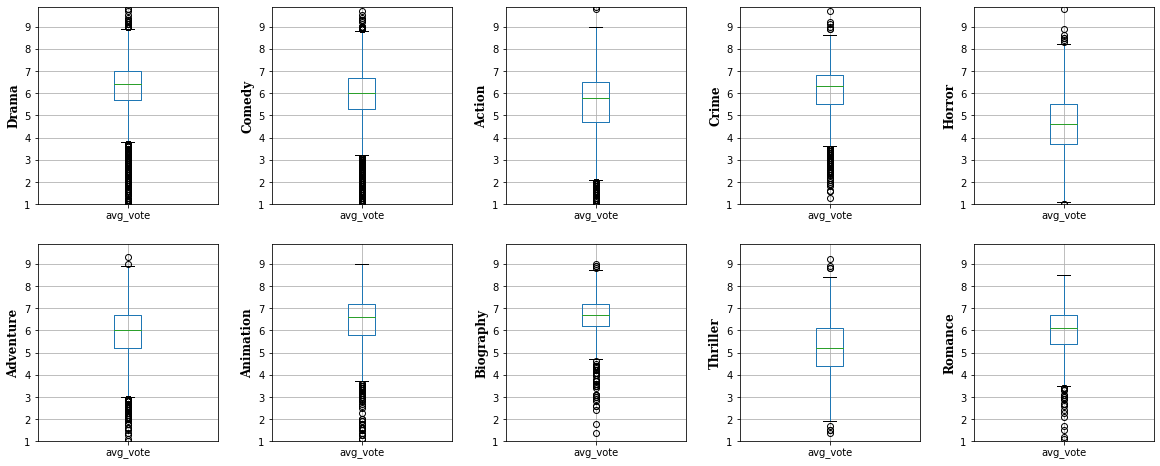

In [ ]:
##Looking at similar box plots for avg votes by movie genre to see if there are any trends. 
##Getting mean of movie duration by genres for top 10 genres
genre_vote = movies[movies.first_genre.isin(genre_order)][["first_genre","avg_vote"]]
##genre_duration = genre_duration.set_index("first_genre")

print("\n\n","\033[1m Average Vote by Genre \033[0m") 

for index in range(10):
    plt.subplot(2,5,index+1)
    plt.ylabel(genre_order[index], fontsize=12, fontweight='bold', fontfamily='serif')
    ##adjusting space between graphs
    plt.subplots_adjust(wspace=0.3)
    ##Making graphs a bit bigger so we can see the boxplots more clearly
    plt.gcf().set_size_inches(20, 8)
    ax = genre_vote[genre_vote.first_genre == genre_order[index]].boxplot()
    ##Making sure they are all on the same y scale so they are easier to compare
    ax.set_ylim([movies.avg_vote.min(), movies.avg_vote.max()])



Looking at boxplots of avg_votes by genre, Horror films have the lowest avg vote with an average of ~4.5. Animation, Biographay and Drama all have higher average votes of around 6.5.  

Drama, Comedy and crime genres have a large number of outliers with avg_votes below 4 vs the mean of 6.5, 6 and 6.5 respectively. 

Animation and Romance movies don't appear to have many outliers above the avg_vote mean. 

#### reviews_from_users and reviews_from_users

In [ ]:
print(movies[["reviews_from_users","reviews_from_critics"]].describe())

print("\nThe movie with the largest number of reviews from critics is " + movies.loc[movies.reviews_from_critics == movies.reviews_from_critics.max(),"original_title"].to_string(index=False, header=False))
print("The movie with the largest number of reviews from users is the " + movies.loc[movies.reviews_from_users == movies.reviews_from_users.max(),"original_title"].to_string(index=False, header=False))




       reviews_from_users  reviews_from_critics
count        78258.000000          74058.000000
mean            46.040826             27.479989
std            178.511411             58.339158
min              1.000000              1.000000
25%              4.000000              3.000000
50%              9.000000              8.000000
75%             27.000000             23.000000
max          10472.000000            999.000000

The movie with the largest number of reviews from critics is The Shape of Water
The movie with the largest number of reviews from users is the Joker


The IQR of 'reviews_from_users' and 'reviews_from_critics' are quite similar however the mean number of reviews from users is much higher then reviews from critics (46 vs 27).  The max number of reviews from users for a movie is 10,472.

We saw in the correlation plot that the correlation of reviews from users and reviews from critics was a strong positive correlation of 0.69. To view this visually I am going to plot a scatterplot.

In [ ]:
# Unique category labels: 'D', 'F', 'G', ...
color_labels = movies['first_genre'].unique()
colors = ['red','green','yellow','black','white','blue','magenta', 'indigo','lime','cyan','olive',
         'coral', 'plum', 'gold','pink','brown','peru','navy','teal','tan','deeppink','slategrey','grey','darkgreen']
# List of RGB triplets
rgb_values = sns.color_palette("Set2")

# Map label to RGB
color_map = dict(zip(color_labels, colors))



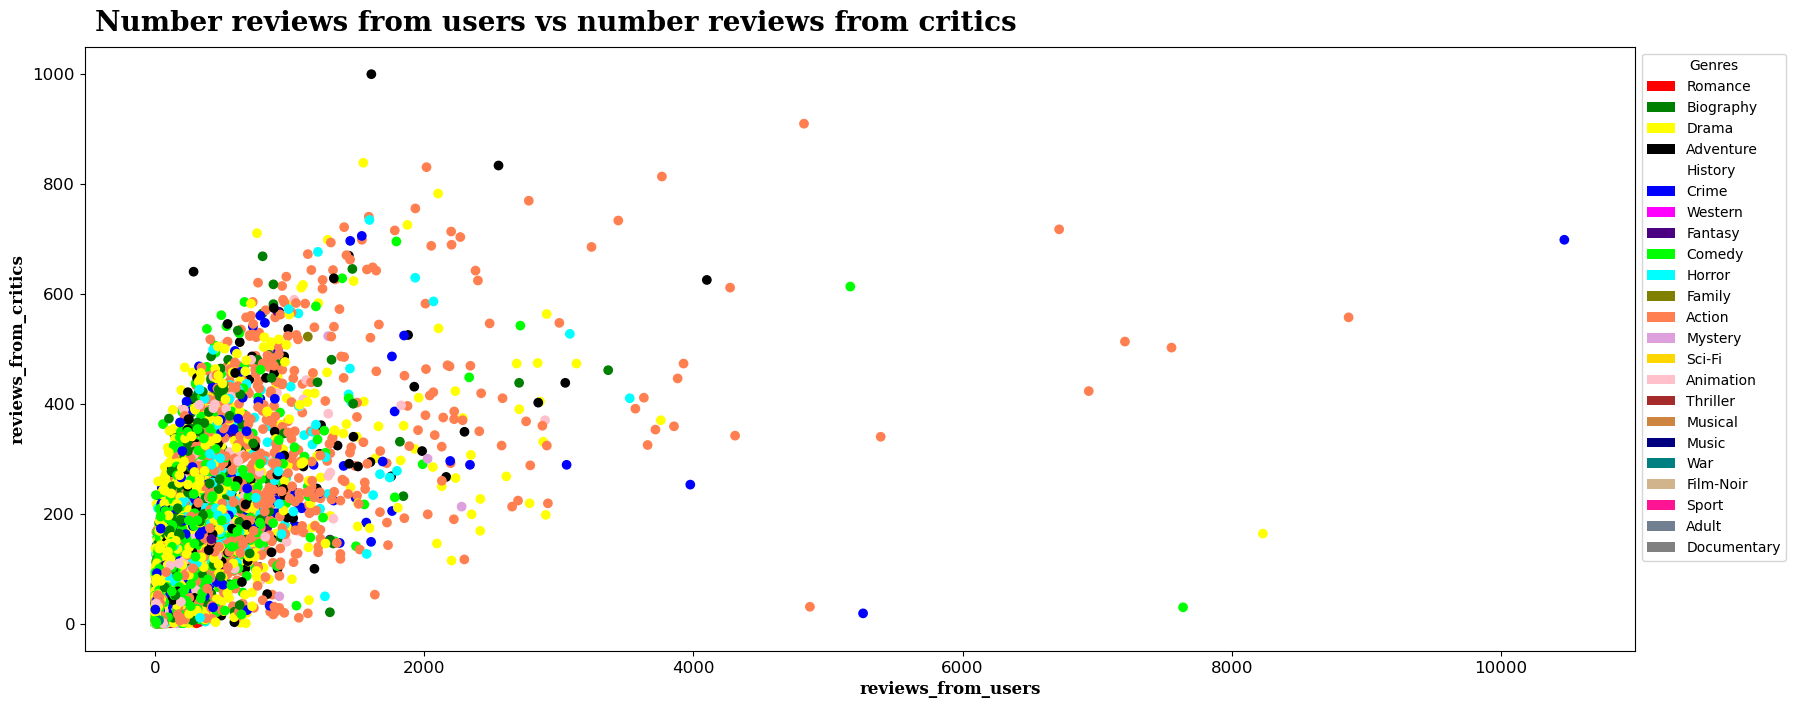

In [ ]:
##Scatter plot of reviews from users vs reviews from critics with genre as color plots
import matplotlib.patches as mpatches
fig, ax = plt.subplots(figsize=(20, 8), dpi=100)


# Tick labels
ax.set_xlabel('xlabel', ha='left', va = 'top')

# Title and sub-title
fig.text(0.13, 0.90, 'Number reviews from users vs number reviews from critics', fontsize=20, fontweight='bold', fontfamily='serif')

#Axis labels

plt.xlabel("reviews_from_users", fontsize=12, fontweight='bold', fontfamily='serif')
plt.ylabel("reviews_from_critics", fontsize=12, fontweight='bold', fontfamily='serif')
    
plt.tick_params(axis='x', which='major', labelsize=12)
plt.tick_params(axis='y', which='major', labelsize=12)

##Scatterplot
scatter = plt.scatter(movies.reviews_from_users,movies.reviews_from_critics,c=movies['first_genre'].map(color_map))

##Creating a custom legend for the plot colors
recs = []
for i in range(0, len(colors)):
        recs.append(mpatches.Rectangle((0, 0), 1, 1, fc=colors[i]))
plt.legend(recs, color_labels, bbox_to_anchor=(1, 1.), title = 'Genres')



We can visualize the positive correlation of reviews_from_critics with reviews_from_users from the scatterplot above. Some outliers exist and by having the genre information available we can see that these are mainly for action movies.  There is one standout from crime with a high value for reviews_from_users and one adventure with a high value for reviews_from_critics. 

Drama and comedy movies appear to have lower values for both reviews_from_users and reviews_from_critics with the majority having below 400 reviews_from_critics and below 1000 reviews_from_users. 



### 4. Deep dive on production companies

In [ ]:
top_10_prod_comp_count = movies.groupby(["production_company"]).count()['imdb_title_id'].sort_values(ascending=False)[:10]
print(movies[movies.production_company.isin(top_10_prod_comp_count.index)][["production_company","avg_vote"]].groupby(["production_company"]).describe())

print("\nThe movies is the lowest avg vote from the top 10 production companies is " + movies.loc[(movies.avg_vote == 1.6) & (movies.production_company == 'Canal+'),["original_title","year"]].to_string(index=False, header=False))
print("\nThe movies is the highest avg vote from the top 10 production companies is " + movies.loc[(movies.avg_vote == 9.2) & (movies.production_company == 'Paramount Pictures'),["original_title","year"]].to_string(index=False, header=False))



                                      avg_vote                                 \
                                         count      mean       std  min   25%   
production_company                                                              
Canal+                                   231.0  6.078355  1.082653  1.6  5.50   
Columbia Pictures                        914.0  6.372319  0.783042  2.2  5.90   
Metro-Goldwyn-Mayer (MGM)               1284.0  6.382555  0.696696  3.1  6.00   
Mosfilm                                  279.0  7.100717  0.693909  4.5  6.75   
Paramount Pictures                       903.0  6.463455  0.751712  2.9  6.10   
RKO Radio Pictures                       535.0  6.250280  0.558988  3.7  5.90   
Twentieth Century Fox                    865.0  6.479653  0.739762  2.2  6.10   
Universal International Pictures (UI)    272.0  6.428309  0.536189  3.8  6.10   
Universal Pictures                       732.0  6.398770  0.789646  3.0  6.00   
Warner Bros.                

The count column above indicates the count of movies by production company. The summary statistics are for the avg_vote variable. We can see that, from the top 10 production companies, Paramont Pictures had the movie with the highest vote of 9.2 - The Godfather in 1972. Canal+ produced the movie with the lowest vote of 1.6 - Le Jour et la nuit in 1997. The production company that produced the most amount of movies in the dataset is Metro-Goldwyn-Mayer(MGM). 



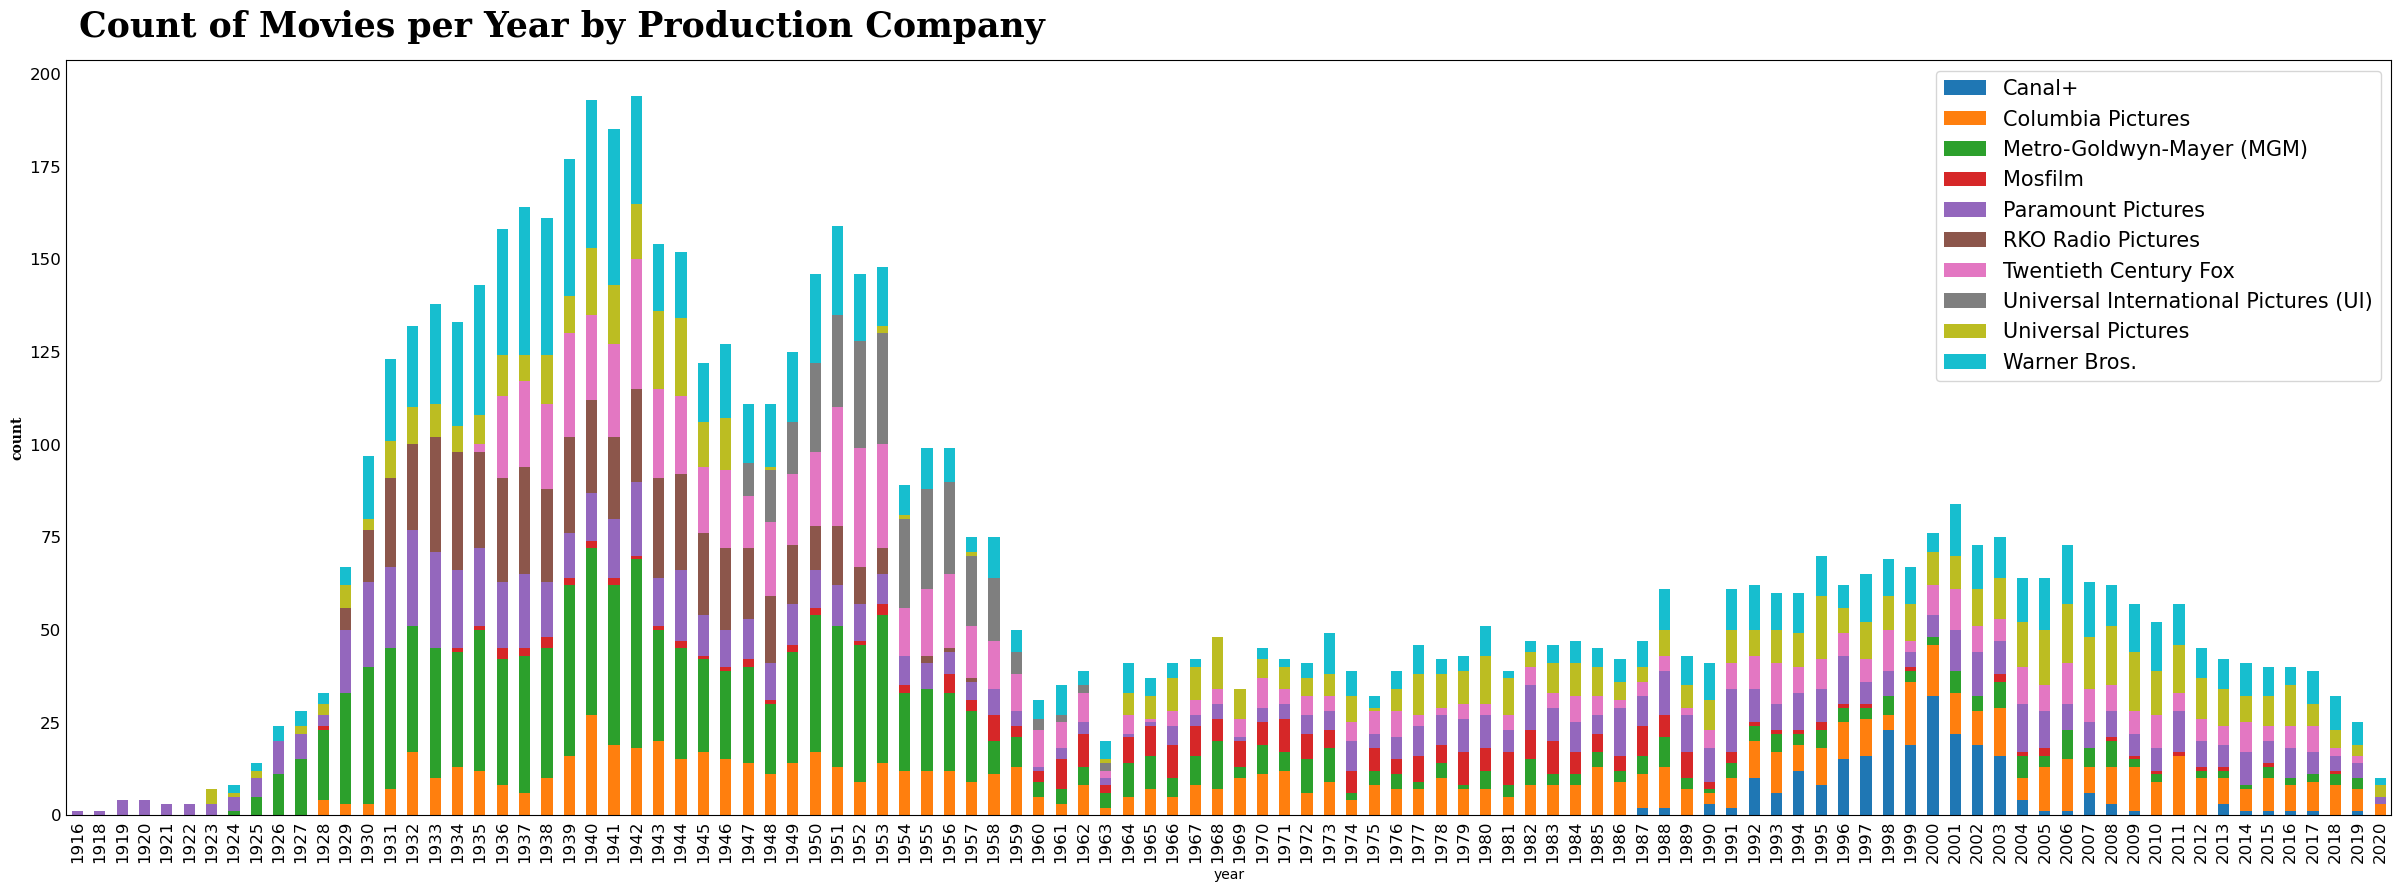

In [ ]:
##Creating a stacked bar chart - using.plot because it is easier for stacked charts with multiple rows
fig, ax = plt.subplots(1,1,figsize=(30, 10), dpi=100)

#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis=u'both', which=u'both',length=0)

##Title
ax.text(0.08, 210, 'Count of Movies per Year by Production Company', fontsize=25, fontweight='bold', fontfamily='serif')

plt.ylabel("count", fontsize=10, fontweight='bold', fontfamily='serif')
movies[movies.production_company.isin(top_10_prod_comp_count.index)].groupby(["year","production_company"]).count()['imdb_title_id'].unstack().plot(kind = 'bar', stacked = True,ax=ax)
ax.tick_params(axis='x', which='major', labelsize=12)
ax.tick_params(axis='y', which='major', labelsize=12)

##Positioning legend to the right

ax.legend(bbox_to_anchor=(1, 1.),prop={'size': 15})




We can see that paramount pictures have been producing movies since 1916. Canal+ seemed to have peaked with movie production around 2000 and have nearly stopped movie production as of late. MGM saw the most volume of movies produced between 1926 - 1958. They appear to still be producing movies but just a much lower volume in recent years. 
Universal Picutres seems to take a break on the movie production from between 1947 to 1963. Looking at this graph I am curious who the biggest producers of movies are in the past 20 years. I will look into this below.

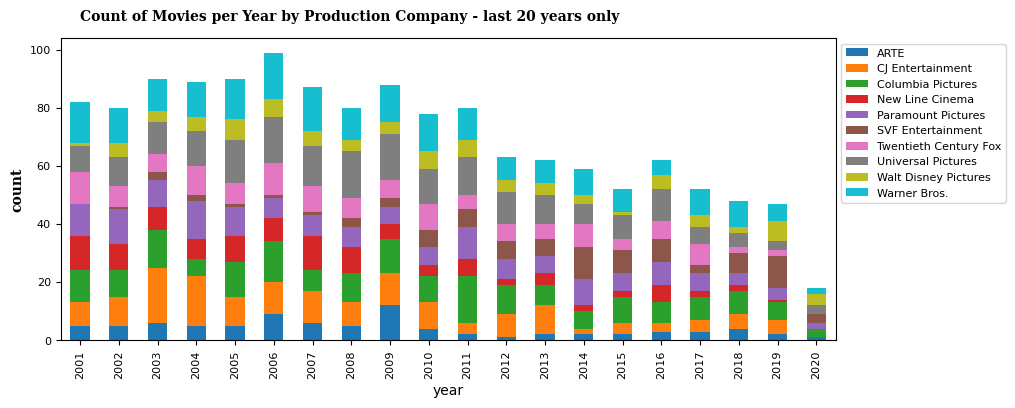

In [ ]:
last_20_years=sorted(movies.year.unique())[-20:]
top_10_prod_comp_count_20_yrs = movies.loc[movies.year.isin(last_20_years)].groupby(["production_company"]).count()['imdb_title_id'].sort_values(ascending=False)[:10]

##Creating a stacked bar chart - using.plot because it is easier for stacked charts with multiple rows
fig, ax = plt.subplots(1,1,figsize=(10, 4), dpi=100)


##Title
ax.text(0, 110, 'Count of Movies per Year by Production Company - last 20 years only', fontsize=10, fontweight='bold', fontfamily='serif')
plt.ylabel("count", fontsize=10, fontweight='bold', fontfamily='serif')

movies[movies.production_company.isin(top_10_prod_comp_count_20_yrs.index)].groupby(["year","production_company"]).count()['imdb_title_id'].unstack().loc[last_20_years].plot(kind = 'bar', stacked = True,ax=ax)
ax.tick_params(axis='x', which='major', labelsize=8)
ax.tick_params(axis='y', which='major', labelsize=8)

##Positioning legend to the right

ax.legend(bbox_to_anchor=(1, 1.),prop={'size': 8})




Quite interestingly, in recent years movie production appears to be more spread out accross multiple different production companies, with no company really producing more than 20 films per year compared to in the 1930's some production companies were producing >50 movies a year. We can see that there are a few overlapping production companies that were the in the top production companies by the number of movies across the 100 years that are still producing the largest number of films in recent years (Columbia Pictures, Paramount Pictures, Twentieth Centrue Fox, Warner Bros, Universal Pictures). 

### 5. Deep dive on Most Voted Movies

In [ ]:
top_20_movie_vote_count = movies.sort_values(by = 'votes',ascending=False)[:20]
top_20_movie_vote_count

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,first_genre,first_country
28453,tt0111161,Le ali della libertà,The Shawshank Redemption,1994,1995-02-10,Drama,142,USA,English,Frank Darabont,...,9.3,2278845,$ 25000000,$ 28699976,$ 28815245,80.0,8232.0,164.0,Drama,USA
48078,tt0468569,Il cavaliere oscuro,The Dark Knight,2008,2008-07-23,"Action, Crime, Drama",152,"USA, UK","English, Mandarin",Christopher Nolan,...,9.0,2241615,$ 185000000,$ 535234033,$ 1005455211,84.0,6938.0,423.0,Action,USA
57475,tt1375666,Inception,Inception,2010,2010-09-24,"Action, Adventure, Sci-Fi",148,"USA, UK","English, Japanese, French",Christopher Nolan,...,8.8,2002816,$ 160000000,$ 292576195,$ 869784991,74.0,3927.0,473.0,Action,USA
32487,tt0137523,Fight Club,Fight Club,1999,1999-10-29,Drama,139,"USA, Germany",English,David Fincher,...,8.8,1807440,$ 63000000,$ 37030102,$ 101218804,66.0,3758.0,370.0,Drama,USA
28381,tt0110912,Pulp Fiction,Pulp Fiction,1994,1994-10-28,"Crime, Drama",154,USA,"English, Spanish, French",Quentin Tarantino,...,8.9,1780147,$ 8000000,$ 107928762,$ 222831817,94.0,3058.0,289.0,Crime,USA
28066,tt0109830,Forrest Gump,Forrest Gump,1994,1994-10-06,"Drama, Romance",142,USA,English,Robert Zemeckis,...,8.8,1755490,$ 55000000,$ 330455270,$ 678229452,82.0,2416.0,169.0,Drama,USA
32229,tt0133093,Matrix,The Matrix,1999,1999-05-07,"Action, Sci-Fi",136,USA,English,"Lana Wachowski, Lilly Wachowski",...,8.7,1632315,$ 63000000,$ 171479930,$ 465718588,73.0,4310.0,342.0,Action,USA
31279,tt0120737,Il Signore degli Anelli - La compagnia dell'An...,The Lord of the Rings: The Fellowship of the Ring,2001,2002-01-18,"Action, Adventure, Drama",178,"New Zealand, USA","English, Sindarin",Peter Jackson,...,8.8,1619920,$ 93000000,$ 315544750,$ 887934303,92.0,5392.0,340.0,Action,New Zealand
34127,tt0167260,Il Signore degli Anelli - Il ritorno del re,The Lord of the Rings: The Return of the King,2003,2004-01-22,"Action, Adventure, Drama",201,"New Zealand, USA","English, Quenya, Old English, Sindarin",Peter Jackson,...,8.9,1604280,$ 94000000,$ 377845905,$ 1142271098,94.0,3718.0,353.0,Action,New Zealand
15528,tt0068646,Il padrino,The Godfather,1972,1972-09-21,"Crime, Drama",175,USA,"English, Italian, Latin",Francis Ford Coppola,...,9.2,1572674,$ 6000000,$ 134966411,$ 246120974,100.0,3977.0,253.0,Crime,USA


                                          original_title  avg_vote
28453                           The Shawshank Redemption       9.3
48078                                    The Dark Knight       9.0
57475                                          Inception       8.8
32487                                         Fight Club       8.8
28381                                       Pulp Fiction       8.9
28066                                       Forrest Gump       8.8
32229                                         The Matrix       8.7
31279  The Lord of the Rings: The Fellowship of the Ring       8.8
34127      The Lord of the Rings: The Return of the King       8.9
15528                                      The Godfather       9.2
57234                              The Dark Knight Rises       8.4
34128              The Lord of the Rings: The Two Towers       8.7
50294                                       Interstellar       8.6
29287                                              Se7en      

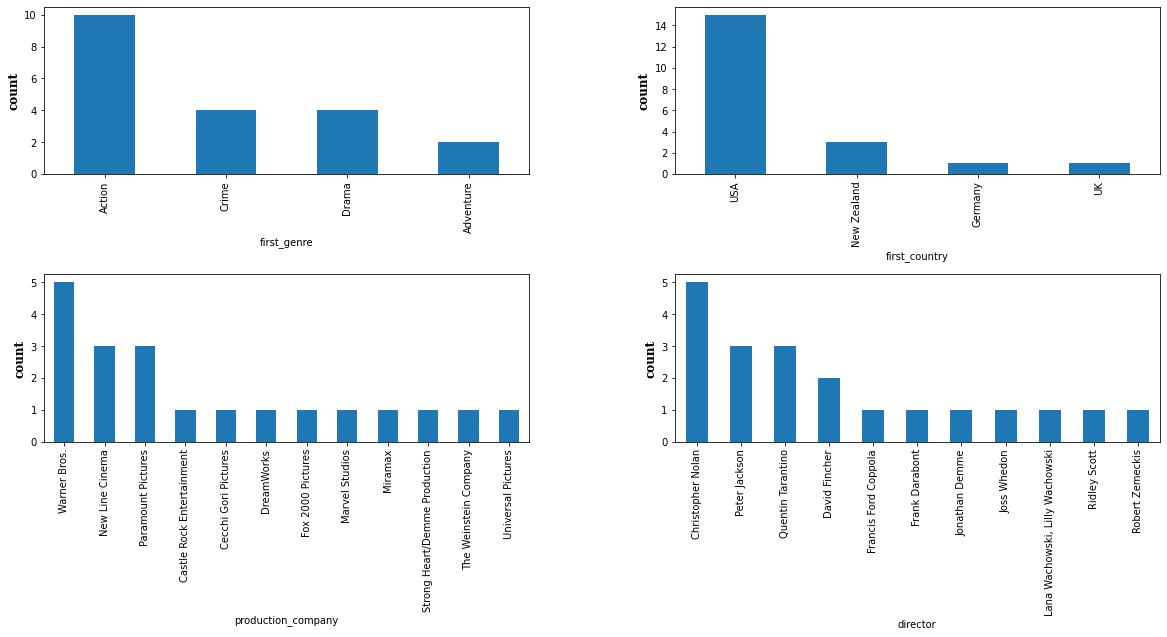

In [ ]:
print(top_20_movie_vote_count[["original_title","avg_vote"]]) 

top_movie_variables = ['first_genre','first_country','production_company','director']

print("\n\n","\033[1m Graphs of 'Top movies by Vote Count' Attributes \033[0m") 

for i in range(0,len(top_movie_variables)):
    plt.subplot(2,2,i+1)
    plt.ylabel("count", fontsize=12, fontweight='bold', fontfamily='serif')
    ##adjusting space between graphs
    plt.subplots_adjust(wspace=0.3, hspace = 0.6)
    ##Making graphs a bit bigger so we can see the boxplots more clearly
    plt.gcf().set_size_inches(20, 8)
    ax = top_20_movie_vote_count.groupby(top_movie_variables[i]).count()['imdb_title_id'].sort_values(ascending=False).plot(kind = 'bar')


Looking at the output and graphs above, the Shawshank redemption had the highest avg_vote out of the top 20 movies with the most votes. In general movies with a large number of votes tend to have higher then average acg_vote values. 

The movies with the most votes show some similarities. 5/20 of the movies were produced by Christopher Nolan. 5/20 of the movies were produced by Warner Bros. 10/20 of the movies were action movies and 14/20 of the movies were in the USA. 

In [ ]:
##Looking into budget and gross income variables and other continuous variables for these movies 
variables_to_convert = ["worlwide_gross_income","budget","usa_gross_income"]

##Converting these variables to be ints
for i in variables_to_convert: 
    if isinstance(top_20_movie_vote_count[i],object) == True: 
        top_20_movie_vote_count[i] = top_20_movie_vote_count[i].astype(str)
        top_20_movie_vote_count[i] = top_20_movie_vote_count[i].map(lambda x: x.lstrip('$').rstrip('aAbBcC'))
        top_20_movie_vote_count[i] = top_20_movie_vote_count[i].astype(int)
    else: 
        print("They are not objects")


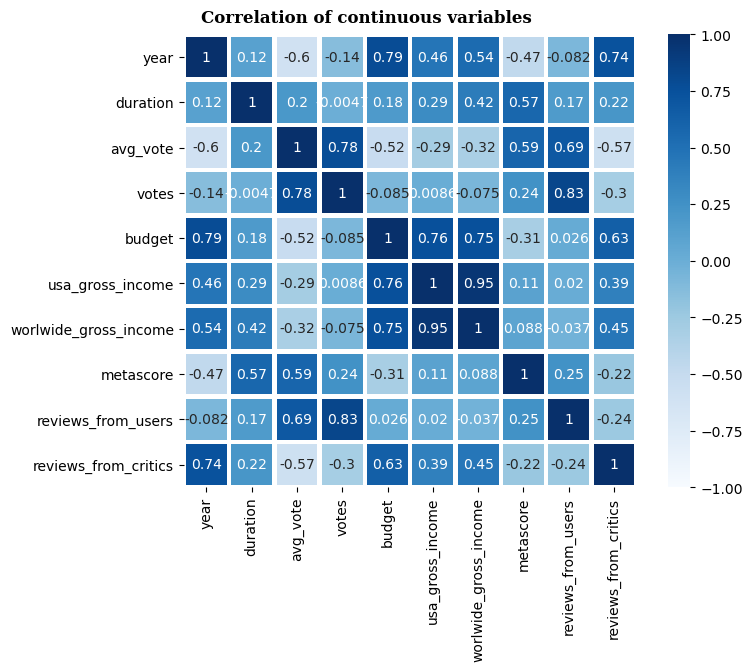

In [ ]:
##Looking at correlation of movie variables for top 20 movies by number of votes
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
fig.text(.2,0.9,'Correlation of continuous variables', fontfamily='serif',fontweight='bold',fontsize=12)
corr = top_20_movie_vote_count.corr()
pl = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool),cmap="Blues", vmax=1,
                 vmin=-1, center=0, square=True, linewidths=2.5, annot=True)

plt.show()






The correlation of the continuous variables for the Top 20 movies by number of votes is quite interesting and different to the correlation we saw when looking at all movies. We can see strong correlation with budget and USA_gross_income and worldwide_gross_income. Budget and year also have a strong correlation which is not overly suprinsing when you think about the standard of movies in recent years compared to in the early 90's. Reviews from critic and year also have a strong correlation 

### 6. Deep dive on Movie Descriptions

In [ ]:
##Removing symbols from the descriptions
import re
text2 = ', '.join(movies.description.dropna())
text2 = re.sub(r'[^\w]', ' ', text2)

In [ ]:
##Tokenizing the movie descriptions
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import FreqDist
words = word_tokenize(text2)
words = [t.lower() for t in words]
##Getting the frequency of words 
FreqDist(words)

FreqDist({'a': 105688, 'the': 99078, 'to': 71440, 'of': 66001, 'and': 61886, 'in': 46895, 'his': 37092, 'is': 35805, 'A': 25705, 'with': 22710, ...})

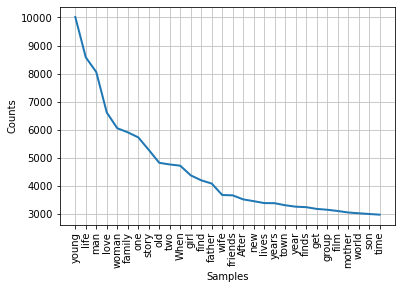

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [ ]:
##Removing stop words
from nltk.corpus import stopwords
stops = stopwords.words('english')
stops = stops + ["A", "In", "An", "The","He"]
stops = set(stops)
tokens = [t for t in words if t not in stops]
##Getting frequency again and doing a simple plot before doing a wordcloud
fd = FreqDist(tokens)
fd.plot(30)

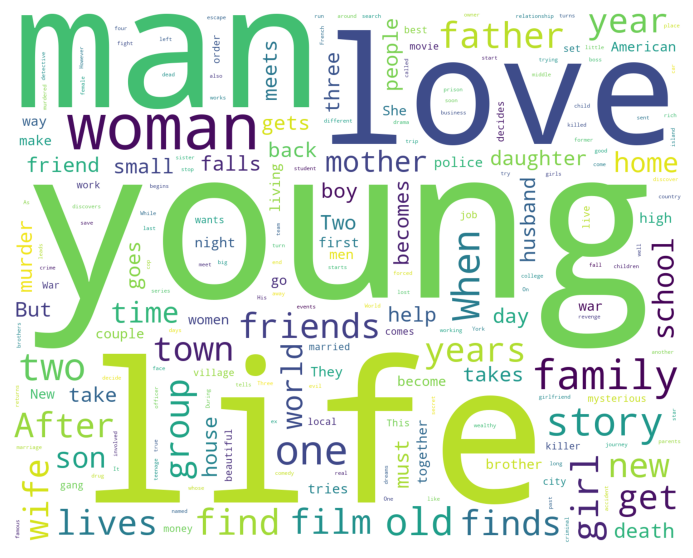

In [ ]:
conda install -c conda-forge wordcloud=1.6.0 
##Creating a wordcloud to visualize the most frquent words in movie descriptions
from wordcloud import WordCloud

wc = WordCloud(max_words=1000, margin=10, background_color='white',
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate_from_frequencies(fd)

plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

We can see that the most frequent words in movies descriptions are 'Young', 'life', 'man' and 'love'. I would like to see if the use of 'young' in movie description is specific to any year or if it is frequent throughout all years.

In [ ]:
##Get movies with young in the description
movies.loc[movies.description.str.contains("young", na=False)]

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,first_genre,first_country
22,tt0003643,The Avenging Conscience: or 'Thou Shalt Not Kill',The Avenging Conscience: or 'Thou Shalt Not Kill',1914,1914-08-24,"Crime, Drama, Horror",78,USA,English,D.W. Griffith,...,6.4,1105,NaN,NaN,NaN,NaN,14.0,11.0,Crime,USA
26,tt0003883,L'enfant de Paris,L'enfant de Paris,1913,1913-09-17,"Crime, Drama",124,France,French,Léonce Perret,...,7.5,303,NaN,NaN,NaN,NaN,7.0,4.0,Crime,France
28,tt0003973,A Florida Enchantment,A Florida Enchantment,1914,1916-09-04,Comedy,63,USA,English,Sidney Drew,...,5.8,202,NaN,NaN,NaN,NaN,6.0,3.0,Comedy,USA
40,tt0004712,A tolonc,A tolonc,1915,1915-03-20,Drama,67,Hungary,Hungarian,Michael Curtiz,...,6.3,165,NaN,NaN,NaN,NaN,1.0,9.0,Drama,Hungary
43,tt0004825,The Wishing Ring: An Idyll of Old England,The Wishing Ring: An Idyll of Old England,1914,1914-11-09,"Comedy, Drama",54,USA,English,Maurice Tourneur,...,6.4,242,NaN,NaN,NaN,NaN,6.0,2.0,Comedy,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85828,tt9886872,Munthiri Monchan,Munthiri Monchan,2019,2019-12-06,"Comedy, Romance",130,India,Malayalam,Vijith Nambiar,...,8.1,990,INR 30000000,NaN,$ 2568,NaN,21.0,1.0,Comedy,India
85833,tt9892338,No Dorai,No Dorai,2019,2019-11-29,Drama,150,Bangladesh,Bengali,Taneem Rahman Angshu,...,7.2,296,$ 1250000,NaN,NaN,NaN,21.0,2.0,Drama,Bangladesh
85837,tt9894470,VFW,VFW,2019,2020-02-14,"Action, Crime, Horror",92,USA,English,Joe Begos,...,6.1,4178,NaN,NaN,$ 23101,72.0,83.0,94.0,Action,USA
85842,tt9900060,Lupin III: La menzogna di Fujiko Mine,Lupin the IIIrd: Mine Fujiko no Uso,2019,2019-05-31,"Animation, Adventure, Crime",58,Japan,Japanese,Takeshi Koike,...,6.9,103,NaN,NaN,NaN,NaN,1.0,1.0,Animation,Japan


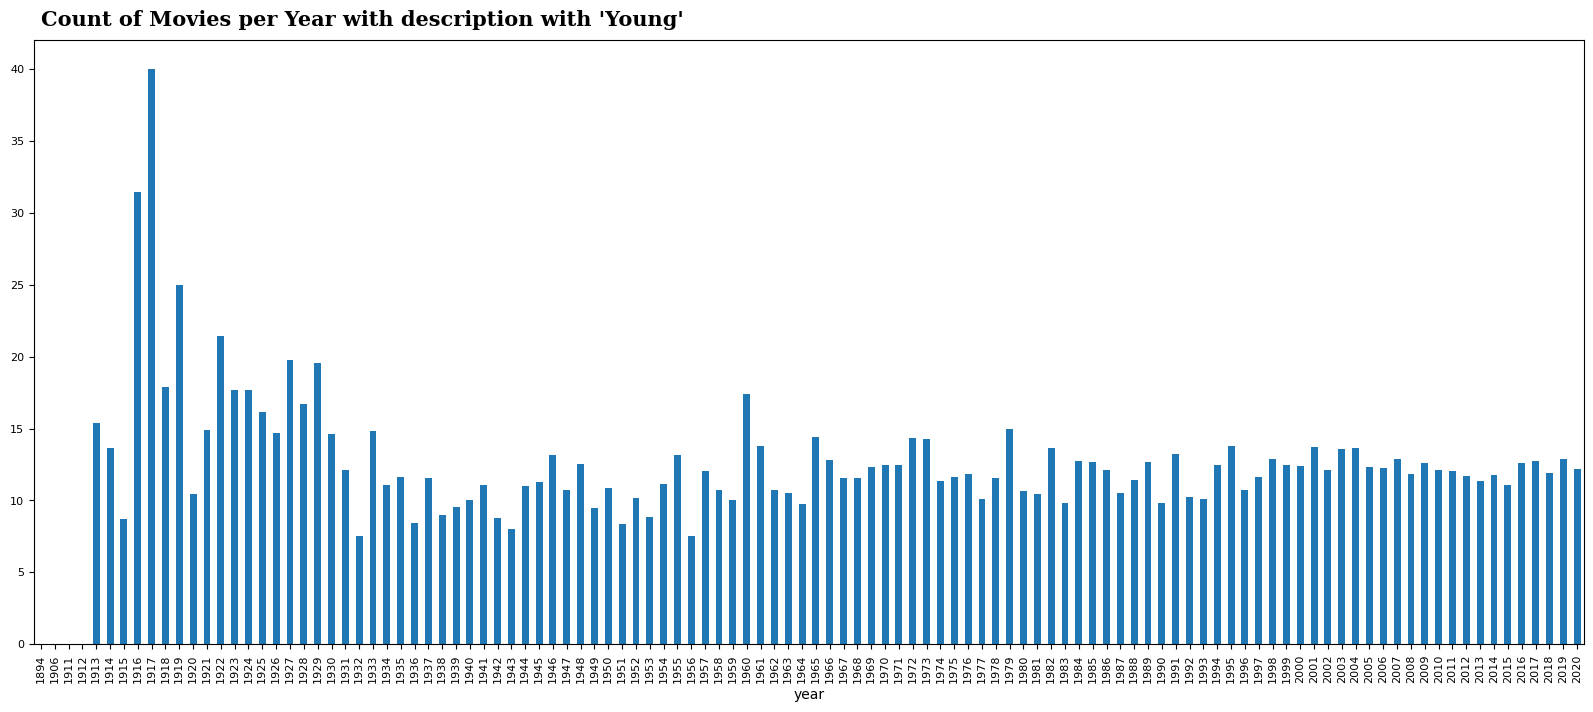

In [ ]:
##Plot the percentage of movies per year with 'young' in the description
movies_with_young = movies.loc[movies.description.str.contains("young", na=False)].groupby(["year"]).count()['imdb_title_id']
movies_year = movies.groupby([movies['year']]).count()['imdb_title_id']
pct_young_per_year = movies_with_young*1.0/movies_year
##getting percent of movies per year with 'young' in the movie description
pct_young_per_year = round(pct_young_per_year*100,2)

fig, ax = plt.subplots(figsize=(20, 8), dpi=100)


##Title
ax.text(0, 43, "Count of Movies per Year with description with 'Young'" , fontsize=15, fontweight='bold', fontfamily='serif')

round(pct_young_per_year,2).plot(kind = 'bar')
ax.tick_params(axis='x', which='major', labelsize=8)
ax.tick_params(axis='y', which='major', labelsize=8)


The percent of movies each year with young in the description is relatively stable at ~ 12 - 18%. A few years have higher peaks with the largest in 1917 where 40% of movies produced had the word 'young' in the description. 

### The end!!